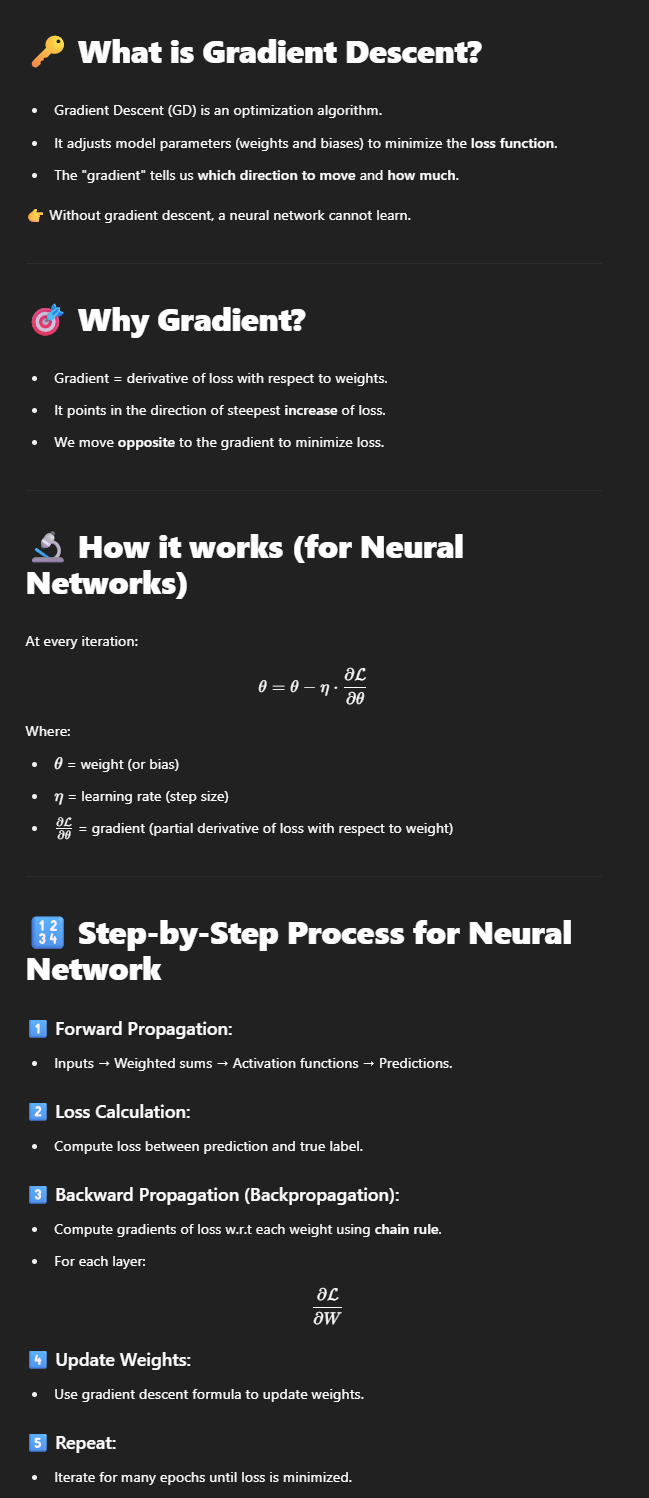

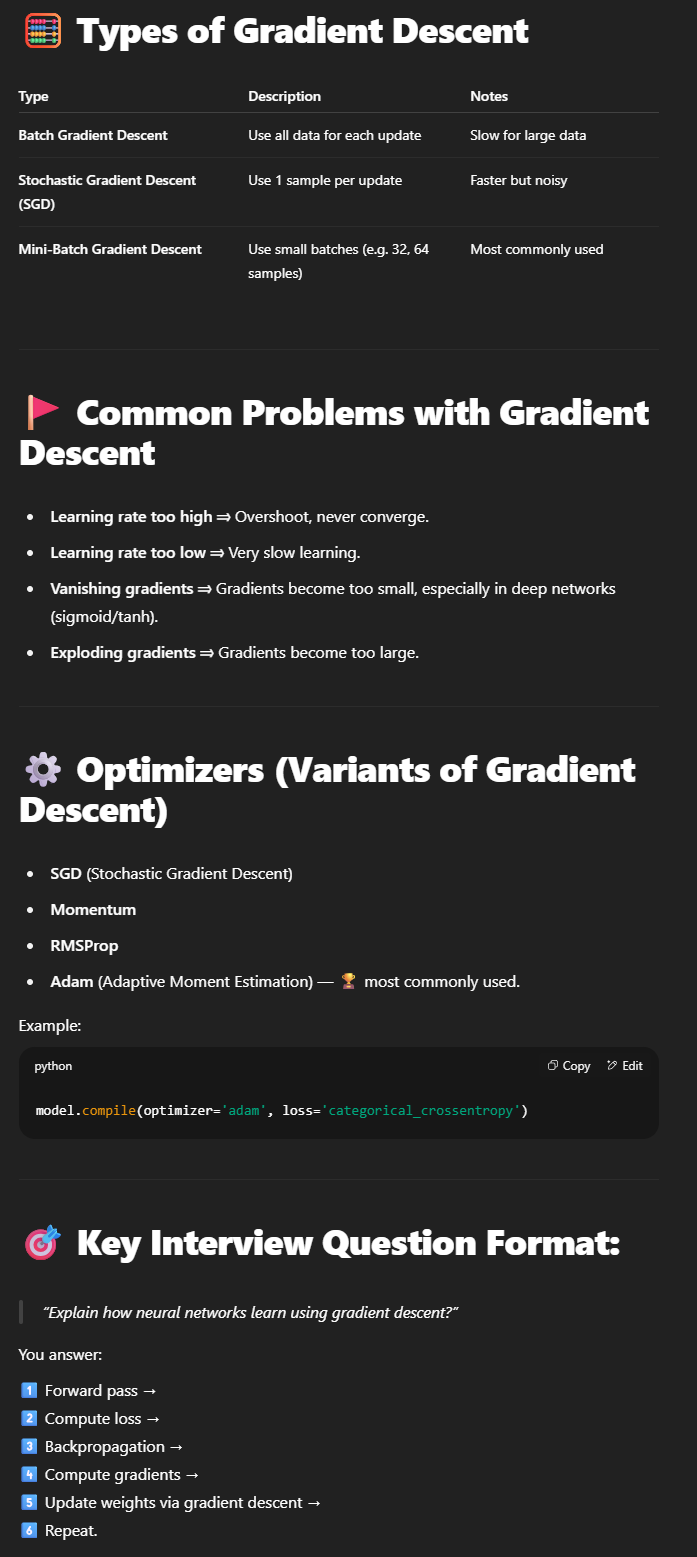

In [ ]:
# Upload the Document

from google.colab import files
files.upload()


Saving insurance_data (1).csv to insurance_data (1).csv


{'insurance_data (1).csv': b'age,affordibility,bought_insurance\n22,1,0\n25,0,0\n47,1,1\n52,0,0\n46,1,1\n56,1,1\n55,0,0\n60,0,1\n62,1,1\n61,1,1\n18,1,0\n28,1,0\n27,0,0\n29,0,0\n49,1,1\n55,1,1\n25,0,1\n58,1,1\n19,0,0\n18,1,0\n21,1,0\n26,0,0\n40,1,1\n45,1,1\n50,1,1\n54,1,1\n23,1,0\n46,1,0\n'}

   age  affordibility  bought_insurance
0   22              1                 0
1   25              0                 0
2   47              1                 1
3   52              0                 0
4   46              1                 1


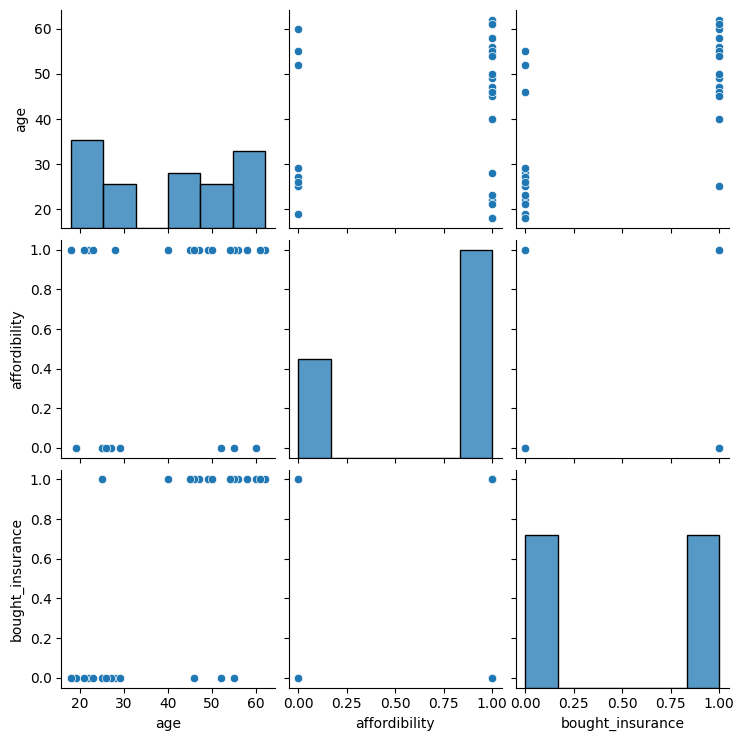

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns




# Define the Dataset

df = pd.read_csv("insurance_data (1).csv")
print(df.head())


# View the data

Pair = sns.pairplot(df)
plt.show()

In [ ]:
# Split the Dataset to Train & Test

x_train,x_test,y_train,y_test = train_test_split(df[["age","affordibility"]], df["bought_insurance"], test_size=0.3, random_state = 2022)


print("Shape of x train :",x_train.shape)
print("Shape of y train :",y_train.shape)
print("Shape of x test :",x_test.shape)
print("Shape of y test :",y_test.shape)

print("\n")


# Scale the data

x_train['age'] = x_train['age']/100
print(x_train['age'])

print("\n")

x_test['age'] = x_test['age']/100
print(x_test['age'])


Shape of x train : (19, 2)
Shape of y train : (19,)
Shape of x test : (9, 2)
Shape of y test : (9,)


19    0.18
10    0.18
15    0.55
24    0.50
6     0.55
3     0.52
0     0.22
22    0.40
8     0.62
11    0.28
1     0.25
9     0.61
23    0.45
18    0.19
26    0.23
25    0.54
17    0.58
16    0.25
13    0.29
Name: age, dtype: float64


7     0.60
12    0.27
4     0.46
14    0.49
20    0.21
27    0.46
5     0.56
21    0.26
2     0.47
Name: age, dtype: float64


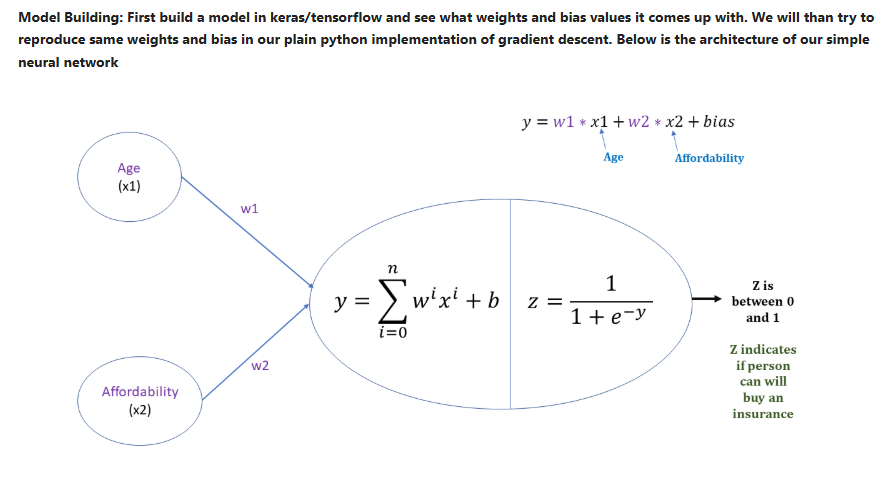

In [ ]:
# Create a Neural Network

Model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros")
])



# Compile

Model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"]
)


# Train the Data

Model.fit(x_train, y_train, epochs=5000)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8421 - loss: 0.5213
Epoch 2502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8421 - loss: 0.5213
Epoch 2503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8421 - loss: 0.5212
Epoch 2504/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8421 - loss: 0.5212
Epoch 2505/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8421 - loss: 0.5211
Epoch 2506/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8421 - loss: 0.5211
Epoch 2507/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8421 - loss: 0.5210
Epoch 2508/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8421 - loss: 0.5210
Epoch 2509/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8421 - loss: 0.5209
Epoch 2510/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8421 - loss: 0.5209
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8421 - loss: 0.52

In [ ]:
# Evaluate the model

Evaluate = Model.evaluate(x_test,y_test)

print("Model Score :", Evaluate)



# Predict

y_predict = Model.predict(x_test)



# To view the Weights & Bias

Coeff, Intercept = Model.get_weights()
print("\n", (Coeff, Intercept))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.7778 - loss: 0.4511
Model Score : [0.4511457681655884, 0.7777777910232544]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step

 (array([[4.8639946],
       [1.5975008]], dtype=float32), array([-3.0650992], dtype=float32))



"This means w1 = 4.8639946, w2 = 1.5975008, bias = -3.0650992."


In [ ]:
# To Check the predicted & Test Data

print(y_predict)

print("\n")

print(y_test)

[[0.46339008]
 [0.14781769]
 [0.6834861 ]
 [0.7141772 ]
 [0.39027426]
 [0.6834861 ]
 [0.7783779 ]
 [0.141795  ]
 [0.6939134 ]]


7     1
12    0
4     1
14    1
20    0
27    0
5     1
21    0
2     1
Name: bought_insurance, dtype: int64


In [ ]:
# Now we start implementing gradient descent in function


import math


# Funtion for Sigmoid

def sigmoid(x):

  return 1/(1 + math.exp(-x))


# Function for Predicted

def predict(age,affordibility):

  Sum = Coeff[0]*age + Coeff[1]*affordibility + Intercept[0]

  return sigmoid(Sum)



# Call the Function

Pred = predict(0.47, 1)
print("Preiction for Age 47 & Affordibility 1 :", Pred)

print("\n")

Pred1 = predict(0.18, 1)
print("Preiction for Age 18 & Affordibility 1 :", Pred1)


print("\n")


Preiction for Age 47 & Affordibility 1 : 0.6939133916564411


Preiction for Age 18 & Affordibility 1 : 0.3561578855182481




/tmp/ipython-input-14-1673294217.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1 + math.exp(-x))


## Creating a Gradient Descent (Without Tensorflow)

Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

First write couple of helper routines such as sigmoid and log_loss

In [1]:
# Sigmoid

def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))


In [1]:
# Log Loss

def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))


All right now comes the time to implement our final gradient descent function.



In [ ]:
# Gradient Descent

def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias



# Call the Function

gradient_descent(x_train['age'],x_train['affordibility'],y_train,1000, 0.4631)


In [ ]:
# To Check the Weight & Bias

print(Coeff, Intercept)
